# GROUP 18 PROJECT

    Group members:
         1.Ian Vaati 
         2.Bernadette Nganga
         3.Muthoni Kahuko

# Business Understanding


This project is based on the analysis of house sales data in King County, for real estate agencies to advise home owners on how performing a renovation might increase the estimated value of their homes thereby helping homeowners make informed decisions regarding home improvements and investments

# Understanding the data

We are using the dataset from  the King County House Sales dataset, which can be found in kc_house_data.csv.

      Stakeholders: Real Estate Agency

From the Column Names file we are able to understand the King County Data Set lot better and understand what each column represent.

Here are the column names and what they decribe

* id - Unique identifier for a house
* date - Date house was sold
* price - Sale price (prediction target)
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms
* sqft_living - Square footage of living space in the home
* sqft_lot - Square footage of the lot
* floors - Number of floors (levels) in house
* waterfront - Whether the house is on a waterfront
* view - Quality of view from house
* condition - How good the overall condition of the house is. Related to maintenance of house.
* grade - Overall grade of the house. Related to the construction and design of the house.
* sqft_above - Square footage of house apart from basement
* sqft_basement - Square footage of the basement
* yr_built - Year when house was built
* yr_renovated - Year when house was renovated
* zipcode - ZIP Code used by the United States Postal Service
* lat - Latitude coordinate
* long - Longitude coordinate
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt
from random import gauss
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #Now lets go ahead and import our data
df = pd.read_csv('kc_house_data.csv')

In [3]:
#Checking the data
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Checking the shape of our data
df.shape

(21597, 21)

In [5]:
#Checking the columns
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
#Checking general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


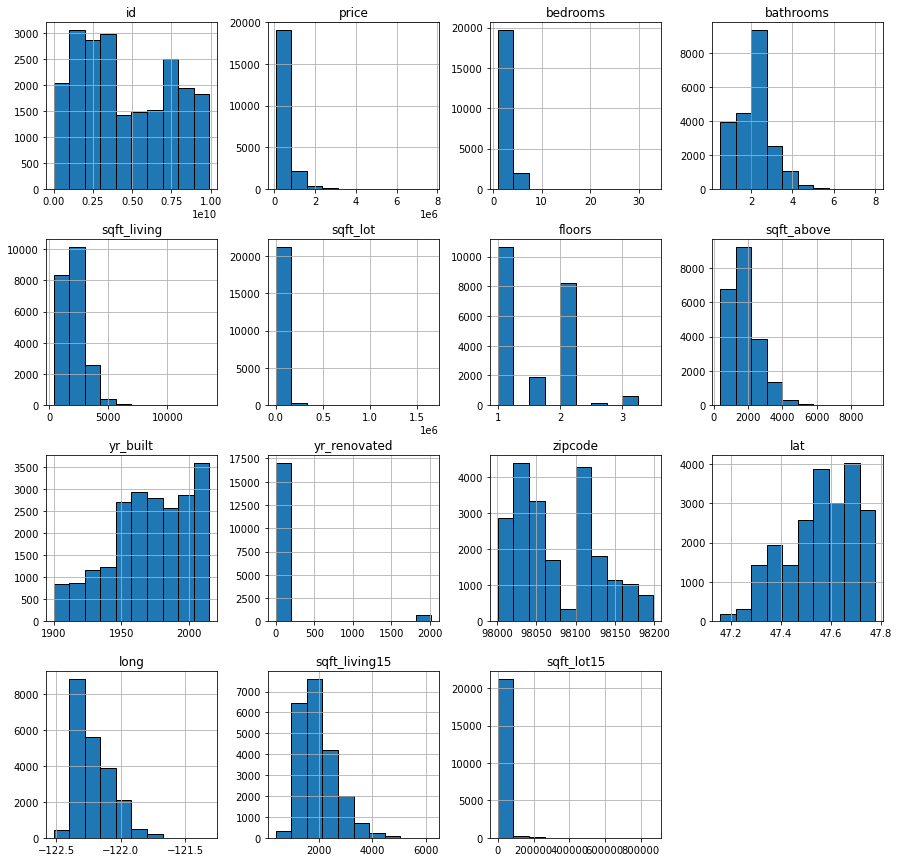

In [8]:
# Visualizing the columns from the data
df.hist(figsize = (15,15), edgecolor = 'black');

Through viewing the data, we are able to see the different data types we are working with. and from this we need to clean the data

# DATA CLEANING

Here I will work on to clean the data and make it more useful. I will start by getting to know the missing values in the dataset. I will accomplish this by writing a function that will give me a number of missing values in each column and the percentage.

In [9]:
# the function below gets the missing values of the dataset.
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [10]:
# I will now call the function and pass my dataset through it to get my desired output.
missing_values(df)

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015
2,view,63,0.002917


We get to know that the colmns with missing values are 'yr_renovated', 'waterfront' and 'view' with a percentage of; 17%, 11% and .2% respectively.

We will now work on the missing values by filling them since they have a significance into our analysis. We will fill the missing values using

I will write a function to help me get this done

In [11]:
# write a function to take the data and column name and fill the missing values with the mode
def fill_values(data, column_name):
    # get the mode of the column
    most_frequent_time = data[column_name].mode()[0]

    # fill the missing values with the most_frequent_time
    data[column_name].fillna(most_frequent_time, inplace= True)

    return data

In [12]:
# fill view column using the function
df = fill_values(df, 'view')
missing_values(df)

,index,Missing Values,Percentage
0,yr_renovated,3842,0.177895
1,waterfront,2376,0.110015


In [13]:
#  fill yr_renovated column using the function
df = fill_values(df, 'yr_renovated')
missing_values(df)

,index,Missing Values,Percentage
0,waterfront,2376,0.110015


In [14]:
#  fill waterfront column using the function
df = fill_values(df, 'waterfront')
missing_values(df)

,index,Missing Values,Percentage


Here we have filled all the missing values we can confirm that by checking the whole dataset using .info()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

We have enough confirmation that the data does not have any missing values.

We can now move to changing the data types of various columns in order to have a seamless analysis.

# Fix structural issues.
Fix the datatypes.

In [16]:
# Convert 'id' to object
df['id'] = df['id'].astype('object')

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Convert 'waterfront', 'view', 'condition', and 'grade' to categorical
df['waterfront'] = df['waterfront'].astype('category')
df['view'] = df['view'].astype('category')
df['condition'] = df['condition'].astype('category')
df['grade'] = df['grade'].astype('category')

# Convert 'sqft_basement' to numeric (handle non-numeric values appropriately)
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Convert 'yr_renovated' to integer
df['yr_renovated'] = df['yr_renovated'].astype('Int64')

We now note that the datatypes are changed. We can now proceed.

you will notice that after changing the data types especially with the 'sqft_basement' when I changed it to numeric the values that could not be converted to numeric, they were turned to NaN while keeping the numeric values intact.

This means that we will have to work on the missing values

In [17]:
# I will first check the number and percentage of the missing values
missing_values(df)


,index,Missing Values,Percentage
0,sqft_basement,454,0.021021


The percentage of the missing values is 2%. I will drop the rows with missing values.

In [18]:
# Drop rows with missing values in the 'sqft_basement' column
df.dropna(subset=['sqft_basement'], inplace=True)

# The 'inplace=True' argument modifies the original DataFrame 'df' in place

# Unique values

Here i willl check all the unique values in the dataframe and remove the unnecessary characters.

In [19]:
def unique_characters_summary(data):
    # Initialize an empty DataFrame to store the results
    unique_chars_df = pd.DataFrame(columns=['Column', 'Unique Characters'])

    # Loop through each column in the DataFrame
    for column_name in data.columns:
        # Get unique characters in the column
        unique_chars = set("".join(data[column_name].astype(str)))

        # Store the result in the DataFrame
        unique_chars_df = unique_chars_df.append({'Column': column_name, 'Unique Characters': "".join(unique_chars)}, ignore_index=True)

    return unique_chars_df

In [20]:
#Checking the unique characters of the data
unique_characters_summary(df)

,Column,Unique Characters
0,id,3512784906
1,date,35127-84906
2,price,3512.784906
3,bedrooms,3512784906
4,bathrooms,3512.78406
5,sqft_living,3512784906
6,sqft_lot,3512784906
7,floors,3512.0
8,waterfront,SNYEO
9,view,TGVRANXLCFEDOI


 Looking at the data we notice that all the columns have characters that are consistent with each value and the datatypes of the columns.

We can now move to check the outliers of the dataset.

In [21]:
df.drop(columns = ['id', 'date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 
                   'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], inplace = True)

In [22]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'yr_built'],
      dtype='object')

# Checking for outliers

I will use a code that will plot box plots of all the numeric columns of my dataset inorder to get a visual of the data is distributed

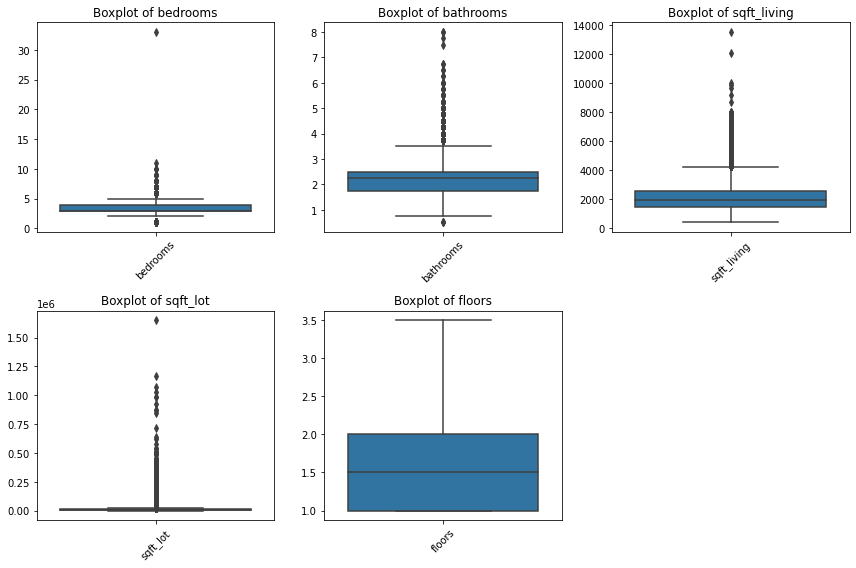

In [23]:
# Defining a list of column names for which you want to create box plots
columns_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']

# Setting up the figure and axis for plotting
plt.figure(figsize=(12, 8))

# Looping through the selected columns and create box plots
for column in columns_to_plot:
    plt.subplot(2, 3, columns_to_plot.index(column) + 1)  # Create a subplot for each column
    sns.boxplot(data= df[[column]])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Since we have more numeric columns we will repeat the plotting and make our comments.


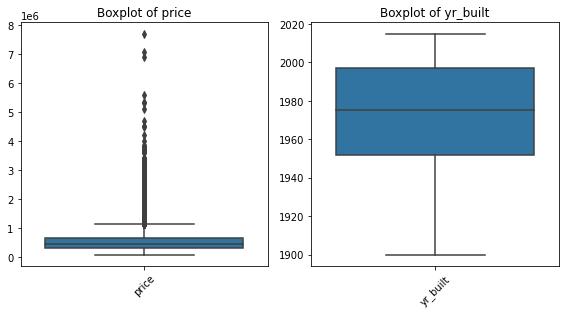

In [24]:
# Defining a list of column names for which you want to create box plots
columns_to_plot = ['price', 'yr_built']

# Setting up the figure and axis for plotting
plt.figure(figsize=(12, 8))

# Looping through the selected columns and create box plots
for column in columns_to_plot:
    plt.subplot(2, 3, columns_to_plot.index(column) + 1)  # Create a subplot for each column
    sns.boxplot(data= df[[column]])
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [25]:
#We can see 33 Bedrooms and other anomalies that will be considered outliers

pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,21143,21143,21143,21143,21143,21143,21143
mean,"540,510.73",3.37,2.12,"2,080.92","15,087.14",1.49,"1,971.02"
std,"368,075.06",0.92,0.77,918.55,"41,209.20",0.54,29.32
min,78000,1,0.50,370,520,1,1900
25%,322000,3,1.75,1430,5043,1,1952
50%,450000,3,2.25,1910,7620,1.50,1975
75%,645000,4,2.50,2550,"10,695.50",2,1997
max,7700000,33,8,13540,1651359,3.50,2015


In [26]:
#Checking to see description for column bedrooms
df.bedrooms.describe()

count   21143
mean     3.37
std      0.92
min         1
25%         3
50%         3
75%         4
max        33
Name: bedrooms, dtype: float64

Checking the bedrooms outliers and removing them from our dataframe

In [27]:
#Removing the outliers
# Calculating Q1, Q3, and IQR
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df= df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]

Now ,lets check the describe for bedrooms and see if we did remove the outlier

In [28]:
df.bedrooms.describe()

count   20630
mean     3.35
std      0.80
min         2
25%         3
50%         3
75%         4
max         5
Name: bedrooms, dtype: float64

lets check bathrooms column for outliers

In [29]:
#Removing the outliers
# Calculating Q1, Q3, and IQR
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df= df[(df['bathrooms'] >= lower_bound) & (df['bathrooms'] <= upper_bound)]

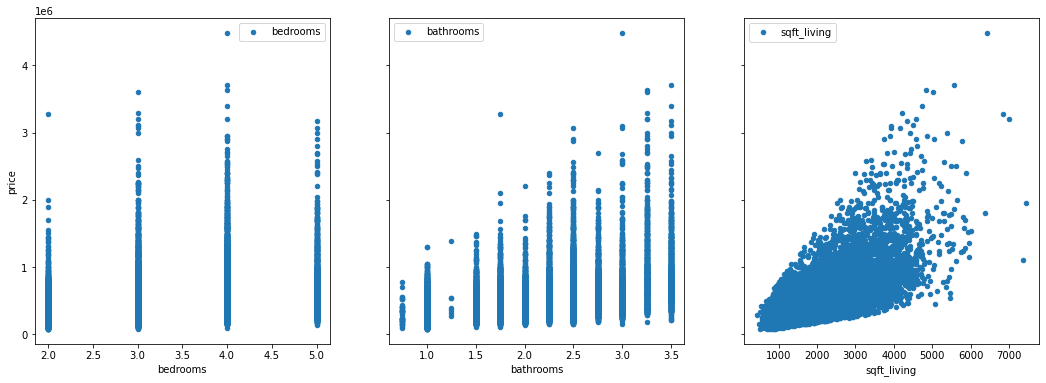

In [30]:
#Plotting the relationship between price with bedrooms,bathrooms and sqft_living after removing the outliers
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['bedrooms', 'bathrooms', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

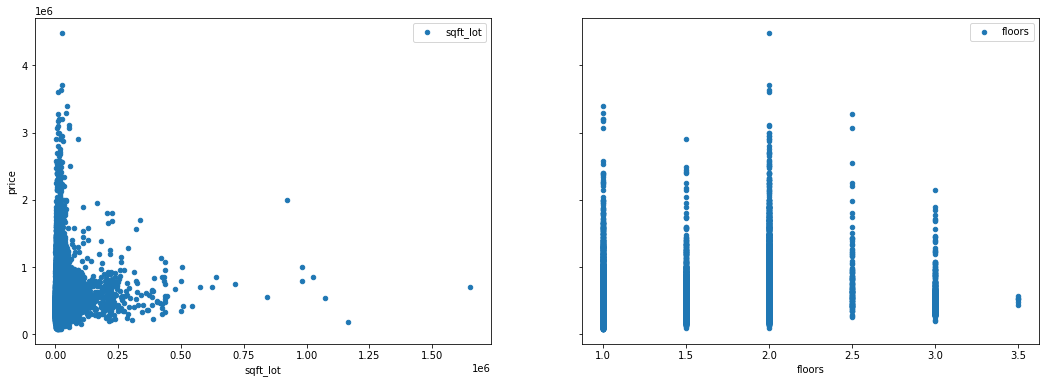

In [31]:
#Plotting the relationship between sqft_lot and floors after removing outliers

fig, axs = plt.subplots(1, 2, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_lot', 'floors']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

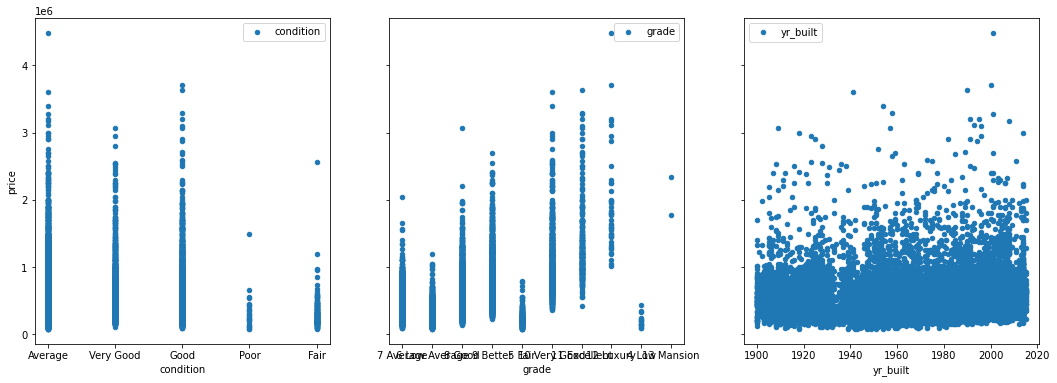

In [32]:
#Plotting the relationship between price and condition,grade and yr_built after removing outliers


fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['condition', 'grade', 'yr_built']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

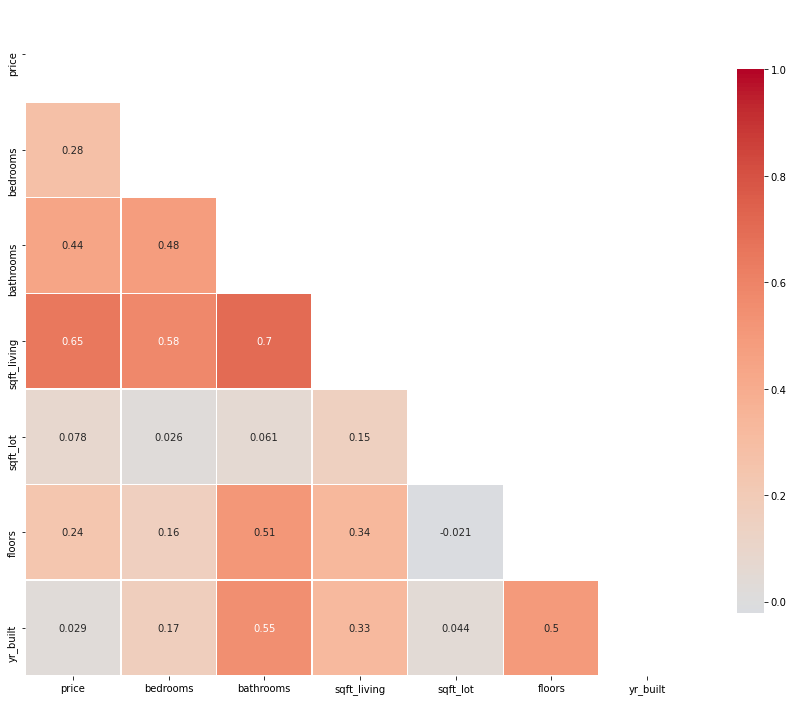

In [33]:
#Heatmap for correlation dataframe
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 20))

sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5});

# BASELINE MODEL

After preparing our data, we'll use to create a model that will help the stakeholders advise the homeowners on what to consider in terms of variables

We'll create a baseline which is a simple linear regression.According to our data, price will be our target varibale. We need to find the variable which is more correlated to the price. 

In [34]:
# Correlation 'Price' vs all variables
data_corrs = df.corr()['price'].map(abs).sort_values(ascending=False)
data_corrs

price            1
sqft_living   0.65
bathrooms     0.44
bedrooms      0.28
floors        0.24
sqft_lot      0.08
yr_built      0.03
Name: price, dtype: float64

In [35]:
# Dropping columns
df.drop(columns = ['floors', 'yr_built'], inplace = True)

In [36]:
# Defining our target variable and single predictor variable
target_variable = 'price'  
single_predictor_variable = 'sqft_living' 

# Creating the model with just one predictor
X = df[single_predictor_variable]
X = sm.add_constant(X)  
y = df[target_variable]

# Fitting the model
baseline_model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(baseline_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 1.511e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:05:26   Log-Likelihood:            -2.7775e+05
No. Observations:               20177   AIC:                         5.555e+05
Df Residuals:                   20175   BIC:                         5.555e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+04   4367.241      4.136      

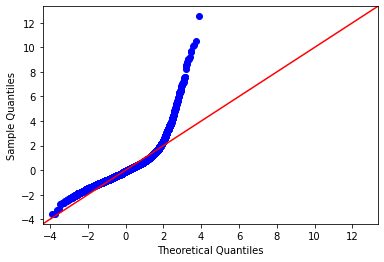

In [37]:
#Plotting to see our regression
residuals = baseline_model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

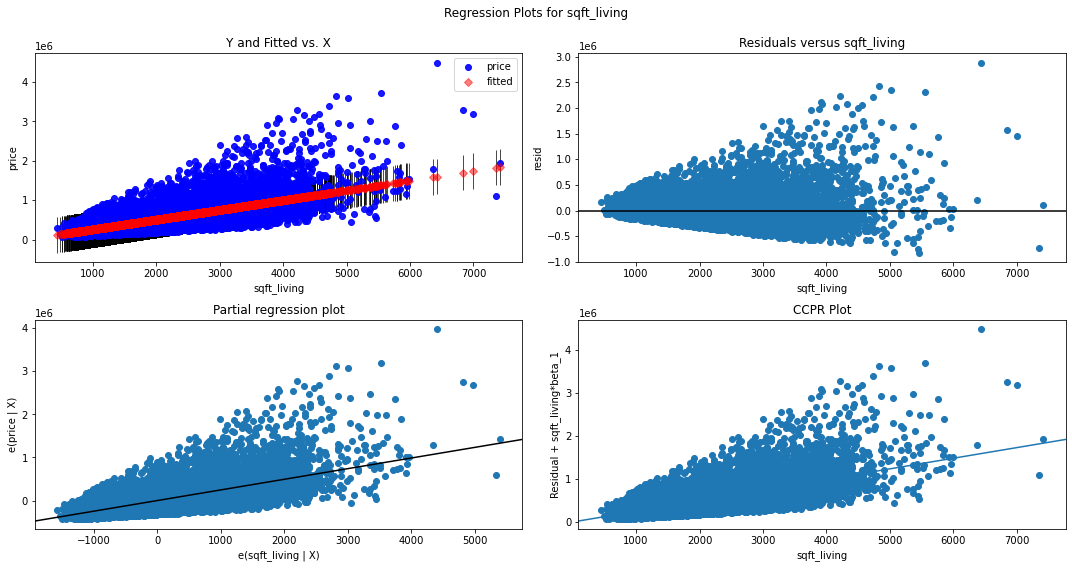

In [38]:
# Regression Plots for 'Price vs Sqft_living'

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(baseline_model, "sqft_living", fig=fig)
plt.show()

In [39]:
#Preparation of Bathrooms columns
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'condition', 'grade']] # deleted foors and yr_built
df.loc[df['bathrooms'] <= 1,'bathrooms'] = 1
df.loc[(df['bathrooms'] > 1) & (df['bathrooms'] <= 2),'bathrooms'] = 2
df.loc[(df['bathrooms'] > 2) & (df['bathrooms'] <= 3),'bathrooms'] = 3
df.loc[(df['bathrooms'] > 3) & (df['bathrooms'] <= 4),'bathrooms'] = 4
df.loc[(df['bathrooms'] > 4) & (df['bathrooms'] <= 5),'bathrooms'] = 5
df.loc[(df['bathrooms'] > 5) & (df['bathrooms'] <= 6),'bathrooms'] = 6
df.loc[(df['bathrooms'] > 6) & (df['bathrooms'] <= 7),'bathrooms'] = 7
df.loc[(df['bathrooms'] > 7) & (df['bathrooms'] <= 8),'bathrooms'] = 8

In [40]:
#Creating a copy of data frame before modifiying with dummies for future models
df_model = df.copy()
df_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,condition,grade
0,221900,3,1,1180,5650,Average,7 Average
1,538000,3,3,2570,7242,Average,7 Average
2,180000,2,1,770,10000,Average,6 Low Average
3,604000,4,3,1960,5000,Very Good,7 Average
4,510000,3,2,1680,8080,Average,8 Good
...,...,...,...,...,...,...,...
21592,360000,3,3,1530,1131,Average,8 Good
21593,400000,4,3,2310,5813,Average,8 Good
21594,402101,2,1,1020,1350,Average,7 Average
21595,400000,3,3,1600,2388,Average,8 Good


In [41]:
#Changing bathrooms to INT64
df['bathrooms'] = df['bathrooms'].astype('Int64')

# Data With Dummies

In [42]:
#Adding dummies for Grade and Bathrooms
df_dummies = pd.get_dummies(df, columns=['grade', 'bathrooms'])

In [43]:
#df.columns
df_dummies

,price,bedrooms,sqft_living,sqft_lot,condition,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4
0,221900,3,1180,5650,Average,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,538000,3,2570,7242,Average,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,180000,2,770,10000,Average,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,604000,4,1960,5000,Very Good,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,510000,3,1680,8080,Average,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,1530,1131,Average,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
21593,400000,4,2310,5813,Average,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
21594,402101,2,1020,1350,Average,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
21595,400000,3,1600,2388,Average,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# MODEL 2

In [44]:
#Checking the columns for dummies dataframe
df_dummies.columns

Index(['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'condition',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury',
       'grade_13 Mansion', 'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair',
       'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good',
       'grade_9 Better', 'bathrooms_1', 'bathrooms_2', 'bathrooms_3',
       'bathrooms_4'],
      dtype='object')

In [45]:
#Replacing spaces with '_'
df_dummies.columns = df_dummies.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [46]:
#Let's display the summary for model2
outcome = 'price'
x_cols = ['sqft_living', 'sqft_lot', 'condition', 
       'grade_5_Fair', 'grade_6_Low_Average', 'grade_7_Average',
       'grade_8_Good', 'grade_9_Better', 'grade_10_Very_Good',
       'grade_11_Excellent',
       'bathrooms_1', 'bathrooms_2', 'bathrooms_3', 'bathrooms_4']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_2 = ols(formula=formula, data=df_dummies).fit()

model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1466.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:05:28   Log-Likelihood:            -2.7560e+05
No. Observations:               20177   AIC:                         5.512e+05
Df Residuals:                   20160   BIC:                         5.514e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               7.415e+05   2.29e+04     32.369      0.000    6.97e+05    7.86e+05
condition[T.Fair]      -1.492e+04    1.7e+04     -0.878      0.380   -4.82e+04    1.84e+04
condition[T.Good]       5.499e+04   3465.551     15.869      0.000    4.82e+04    6.18e+04
condition[T.Poor]       2.688e+04   4.26e+04      0.631      0.528   -5.66e+04     1.1e+05
condition[T.Very Good]  1.377e+05   5584.085     24.657      0.000    1.27e+05    1.49e+05
sqft_living              147.5458      3.051     48.366      0.000     141.566     153.525
sqft_lot                  -0.2044      0.037     -5.458      0.000      -0.278      -0.131
grade_5_Fair           -8.832e+05   3.14e+04    -28.155      0.000   -9.45e+05   -8.22e+05
grade_6_Low_Average    -8.498e+05   2.79e+04    -30.465      0.000   -9.04e+05   -7.95e+05
grade_7_Average        -7.873e+05   2.74e+04    -28.767      0.000   -8.41e+05   -7.34e+05
grade_8_Good            -6.91e+05   2.72e+04    -25.374      0.000   -7.44e+05   -6.38e+05
grade_9_Better         -5.586e+05   2.71e+04    -20.582      0.000   -6.12e+05   -5.05e+05
grade_10_Very_Good     -3.979e+05   2.75e+04    -14.480      0.000   -4.52e+05   -3.44e+05
grade_11_Excellent      -1.71e+05   2.96e+04     -5.775      0.000   -2.29e+05   -1.13e+05
bathrooms_1             2.102e+05   6669.871     31.520      0.000    1.97e+05    2.23e+05
bathrooms_2             1.769e+05   6417.650     27.564      0.000    1.64e+05    1.89e+05
bathrooms_3             1.314e+05   6554.837     20.043      0.000    1.19e+05    1.44e+05
bathrooms_4             2.229e+05   8188.144     27.228      0.000    2.07e+05    2.39e+05
==============================================================================
Omnibus:                    10093.410   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           152476.411
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      15.835   Cond. No.                     9.56e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.94e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

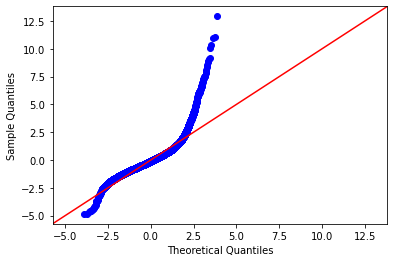

In [47]:
#Plotting the regression
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, )    
plt.show;

In [48]:
#Selecting 'X' and 'Y' values from data_log for train-test split
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

df_dummies

,price,bedrooms,sqft_living,sqft_lot,condition,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4
0,221900,3,1180,5650,Average,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,538000,3,2570,7242,Average,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,180000,2,770,10000,Average,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,604000,4,1960,5000,Very Good,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,510000,3,1680,8080,Average,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000,3,1530,1131,Average,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
21593,400000,4,2310,5813,Average,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
21594,402101,2,1020,1350,Average,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
21595,400000,3,1600,2388,Average,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [49]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16141 4036 16141 4036


In [50]:
X_train = pd.get_dummies(X_train, columns=['condition'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['condition'], drop_first=True)

# Now, you should have columns like 'condition_Average', 'condition_Very Good', etc.
# These columns represent the different categories in the 'condition' column.

# Next, you can fit your linear regression model.
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions and calculate mean squared error as before.
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 40256624556.43112
Test Mean Squared Error: 47876981894.07988


In [51]:
#Cross-validating the results 
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
cv_5_results.mean()

nan

<AxesSubplot:xlabel='price', ylabel='Density'>

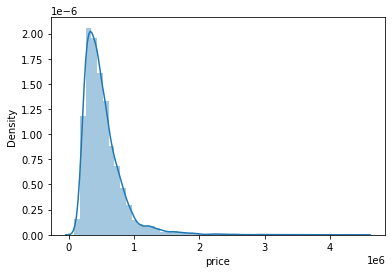

In [52]:
# Ploting the price
sns.distplot(df_dummies['price'])

<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

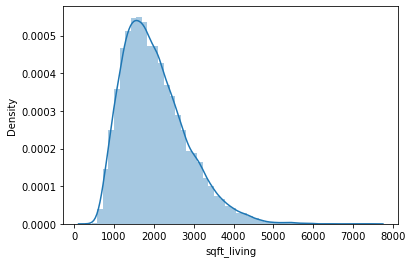

In [53]:
# Plottig the sqft_living
sns.distplot(df_dummies['sqft_living'])

# Data  log transformation

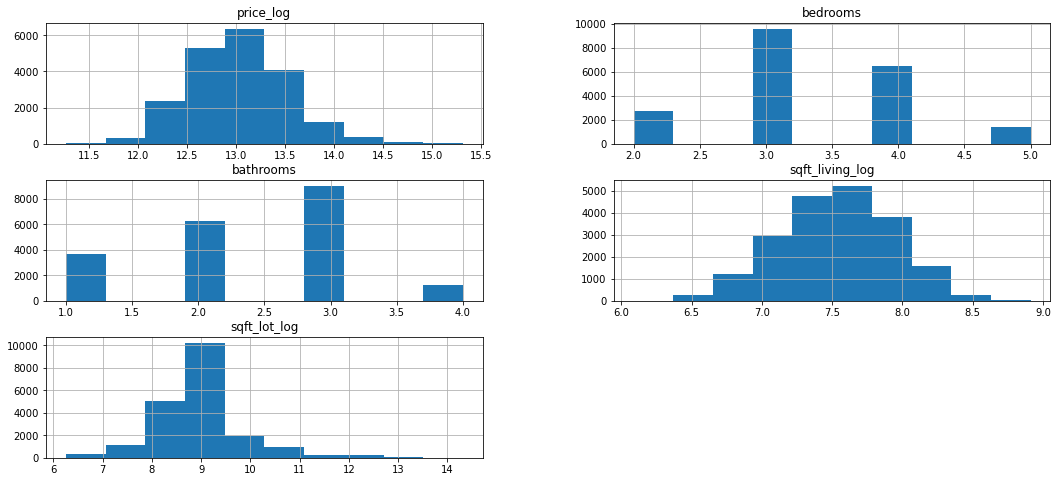

In [54]:
#Perfroming data log transformation
data_log = pd.DataFrame([])
   
data_log['price_log'] = np.log(df_model['price'])
data_log['bedrooms'] = (df_model['bedrooms'])
data_log['bathrooms'] = (df_model['bathrooms'])
data_log['sqft_living_log'] = np.log(df_model['sqft_living'])
data_log['sqft_lot_log'] = np.log(df_model['sqft_lot'])
data_log['condition'] = (df_model['condition'])
data_log['grade'] = (df_model['grade'])
   
data_log.hist(figsize  = [18,8]);

In [55]:
#Changing bathrooms to 'INT64'

data_log['bathrooms'] = data_log['bathrooms'].astype('Int64')

In [56]:
#Adding dummies for grade, bedrooms and bathrooms

data_log = pd.get_dummies(data_log, columns=['grade', 'bedrooms','bathrooms','condition'])

# MODEL 3

In [57]:
#Checking the data_log df
data_log

,price_log,sqft_living_log,sqft_lot_log,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,...,bedrooms_5,bathrooms_1,bathrooms_2,bathrooms_3,bathrooms_4,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,12.31,7.07,8.64,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,13.20,7.85,8.89,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
2,12.10,6.65,9.21,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,13.31,7.58,8.52,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,13.14,7.43,9.00,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,12.79,7.33,7.03,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
21593,12.90,7.75,8.67,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
21594,12.90,6.93,7.21,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
21595,12.90,7.38,7.78,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [58]:
#Checking the columns
data_log.columns

Index(['price_log', 'sqft_living_log', 'sqft_lot_log', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_3 Poor', 'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very Good'],
      dtype='object')

In [59]:
#Replacing spaces with '_'
data_log.columns = data_log.columns.str.replace('[^a-zA-Z0-9]', '_', regex=True)

In [60]:
#Now let's see the data_log columns after replacing
data_log.columns

Index(['price_log', 'sqft_living_log', 'sqft_lot_log', 'grade_10_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average',
       'grade_7_Average', 'grade_8_Good', 'grade_9_Better', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bathrooms_1', 'bathrooms_2',
       'bathrooms_3', 'bathrooms_4', 'condition_Average', 'condition_Fair',
       'condition_Good', 'condition_Poor', 'condition_Very_Good'],
      dtype='object')

In [61]:
#Checking summary for model_3
outcome = 'price_log'
x_cols = ['sqft_living_log', 'sqft_lot_log', 'grade_10_Very_Good',
       'grade_11_Excellent', 'grade_12_Luxury', 'grade_13_Mansion',
       'grade_3_Poor', 'grade_4_Low', 'grade_5_Fair', 'grade_6_Low_Average',
       'grade_7_Average', 'grade_8_Good', 'bedrooms_2',
       'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 
       'condition_Average', 'condition_Fair', 'condition_Good',
       'condition_Poor', 'condition_Very_Good']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model_3 = ols(formula=formula, data=data_log).fit()

model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     1323.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:05:31   Log-Likelihood:                -6695.2
No. Observations:               20177   AIC:                         1.343e+04
Df Residuals:                   20158   BIC:                         1.358e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7379      0.058    115.545      0.000       6.624       6.852
sqft_living_log         0.5315      0.011     48.757      0.000       0.510       0.553
sqft_lot_log           -0.0479      0.003    -16.352      0.000      -0.054      -0.042
grade_10_Very_Good      0.2103      0.013     16.034      0.000       0.185       0.236
grade_11_Excellent      0.4243      0.023     18.705      0.000       0.380       0.469
grade_12_Luxury         0.7057      0.052     13.674      0.000       0.605       0.807
grade_13_Mansion        0.8596      0.239      3.601      0.000       0.392       1.328
grade_3_Poor        -2.622e-15   9.71e-17    -27.008      0.000   -2.81e-15   -2.43e-15
grade_4_Low            -0.8175      0.088     -9.251      0.000      -0.991      -0.644
grade_5_Fair           -0.7277      0.027    -26.762      0.000      -0.781      -0.674
grade_6_Low_Average    -0.5836      0.013    -44.378      0.000      -0.609      -0.558
grade_7_Average        -0.4184      0.009    -45.217      0.000      -0.437      -0.400
grade_8_Good           -0.2344      0.009    -27.454      0.000      -0.251      -0.218
bedrooms_2              1.8117      0.013    141.910      0.000       1.787       1.837
bedrooms_3              1.6516      0.014    115.269      0.000       1.624       1.680
bedrooms_4              1.6223      0.016     98.326      0.000       1.590       1.655
bedrooms_5              1.6524      0.019     87.639      0.000       1.615       1.689
condition_Average       1.2940      0.017     74.099      0.000       1.260       1.328
condition_Fair          1.1979      0.028     42.797      0.000       1.143       1.253
condition_Good          1.3995      0.018     78.733      0.000       1.365       1.434
condition_Poor          1.3165      0.059     22.422      0.000       1.201       1.432
condition_Very_Good     1.5301      0.019     81.176      0.000       1.493       1.567
==============================================================================
Omnibus:                       46.563   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.904
Skew:                           0.114   Prob(JB):                     6.53e-11
Kurtosis:                       3.061   Cond. No.                     5.18e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# REGRESSION RESULTS

The final model that we chose is Model 3.This is the reason:


* Baseline Model R-squared: 0.428
* Final Model R-squared: 0.542


The R-squared value in the final model (0.542) is higher than in the baseline model (0.428) and the model 2 (0.538). This indicates that the final model explains a larger proportion of the variance in the dependent variable (log-transformed price) compared to the baseline model. In practical terms, the final model provides a better fit to the data, capturing more of the variation in property prices.


* The R-squared value for the final regression model is 0.542. This means that 54.2% of the variation in the log-transformed property prices (price_log) can be explained by the combination of independent variables used in the model. This means, more than half (54.2%) of the variability in log prices is accounted for by the predictors, while the remaining 45.8% is not explained by this model.

* Coefficients: Looking at the coefficients of the key independent variables in our final model:

   1. Intercept (6.7379): The intercept indicates the estimated log price when all other independent variables are zero.

   2. sqft_living_log (0.5315): The coefficient for sqft_living_log suggests that for every 1 unit increase in the log-transformed square footage of living space, we expect an estimated increase of 0.5315 in the log price. This is true even when all other variables remain constant.

  3. sqft_lot_log (-0.0479): The coefficient for sqft_lot_log suggests that for every 1 unit increase in the log-transformed square footage of the lot size, we can expect an decrease of approximately 0.0479 in the log price. This is also true when all other variables remain constant.

  4. Grade, Bedrooms, and Condition Variables: These variables represent various property characteristics such as grade, bedrooms, and condition. The coefficients associated with these variables indicate how they influence the log price compared to their respective reference categories.

* Statistical significance


All the coefficients in the model, including the intercept and the coefficients for sqft_living_log, sqft_lot_log, and the binary variables, are statistically significant. This means that the estimated impact of each variable on the log price is unlikely to be due to random chance. The p-values associated with these coefficients are less than the conventional significance level (typically 0.05), indicating their significance in predicting the log-transformed property prices.

# RECOMMENDATION

1. Real estate agencies can benefit from utilizing the regression model for pricing guidance to provide homeowners with accurate insights into how renovations or improvements can affect the estimated value of their homes. Using this model, agencies can provide homeowners with estimated price increases or decreases based on various property characteristics such as square footage, condition, and grade. 

2. Agencies can also use the coefficients of the model to identify key renovation opportunities that have the most significant impact on home values. This allows them to advise homeowners on the renovations that are likely to yield the highest return on investment. 

3. It's important for agencies to tailor their recommendations to individual homeowners based on their property's current condition, size, and location. For example, if a property has a large square footage but a low-grade rating, agencies can suggest upgrading the interior to improve the home's value. 

4. Keeping homeowners informed about current real estate market conditions is crucial, and agencies should educate their clients on how these conditions may affect the return on investment for renovations. Additionally, by establishing partnerships or collaborating with trusted contractors, agencies can provide homeowners with quotes and expertise to streamline the renovation process and build trust with their clients.

# LIMITATIONS

Here are some limitations that may have help when advising the home-owners to help make informed decisions:

1. Data Quality: The accuracy of the model is dependent on the quality and completeness of the data used during training. Therefore, it is important to ensure that the data sources are reliable and up-to-date.

2. Market Volatility: Real estate markets can be influenced by various external factors, including economic conditions and local events. The model may not account for short-term market fluctuations, so it's important to be aware of these potential risks.

3. Renovation Costs: The model provides estimated price impacts, but actual renovation costs can vary widely. Therefore, it's important to make sure homeowners understand that actual expenses may differ from estimates.

4. Model Updates: Real estate markets evolve, so periodic updates to the model and recommendations may be necessary to reflect changing market dynamics.

5. Individual Preferences: Homeowners may have personal preferences that are not captured by the model. Some may prioritize certain features over others, which the model may not reflect. Therefore, it's important to take into account individual preferences when making renovation decisions.